In [2]:
import pandas as pd



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split


In [4]:
df = pd.read_csv("C:\\Users\\Namulametu Keerthana\\Documents\\projects\\Amazon Products Reviews Analysis\\Amazon Products Reviews.csv")


In [5]:
df.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


Here's an updated and clearer description of each column  explanation:

1. **id**: Unique identifier for each product listing or review (may be used for individual records in the dataset).
   
2. **asins**: Amazon Standard Identification Number (ASIN), a unique identifier for each product on Amazon.

3. **brand**: The brand or manufacturer of the product.

4. **categories**: The category or categories under which the product is listed (e.g., "Amazon Devices," "Kindle").

5. **colors**: The color(s) of the product, if applicable.

6. **dateAdded**: The date when the product was first added to Amazon.

7. **dateUpdated**: The date when the product information was last updated.

8. **dimension**: The physical dimensions of the product (e.g., "169 mm x 117 mm x 9.1 mm").

9. **ean**: European Article Number (EAN), a unique barcode used for identifying the product.

10. **keys**: Specially assigned keywords for the product, which could be part of the product's identification.

11. **manufacturer**: The name of the manufacturer of the product.

12. **manufacturerNumber**: A unique number assigned by the manufacturer to identify the product.

13. **name**: The name of the product (e.g., "Kindle Paperwhite").

14. **prices**: The price of the product listed on Amazon.

15. **reviews.date**: The date when the review was submitted by a user.

16. **reviews.doRecommend**: Indicates if the reviewer recommends the product (e.g., "Yes" or "No").

17. **reviews.numHelpful**: The number of upvotes the review has received, indicating how helpful other users found it.

18. **reviews.rating**: The rating given to the product by the reviewer, usually between 1 and 5 stars.

19. **reviews.sourceURLs**: The URL where the review is sourced from, typically the Amazon product page.

20. **reviews.text**: The full text of the product review written by the user.

21. **reviews.title**: The title or heading of the review.

22. **reviews.userCity**: The city where the reviewer is located (if available).

23. **reviews.userProvince**: The province or state where the reviewer is located (if available).

24. **reviews.username**: The username of the person who wrote the review.

25. **sizes**: Available sizes of the product (if applicable, such as clothing sizes or product variations).

26. **upc**: Universal Product Code (UPC), another barcode used for product identification.

27. **weight**: The weight of the product.



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1597 non-null   object 
 1   asins                 1597 non-null   object 
 2   brand                 1597 non-null   object 
 3   categories            1597 non-null   object 
 4   colors                774 non-null    object 
 5   dateAdded             1597 non-null   object 
 6   dateUpdated           1597 non-null   object 
 7   dimension             565 non-null    object 
 8   ean                   898 non-null    float64
 9   keys                  1597 non-null   object 
 10  manufacturer          965 non-null    object 
 11  manufacturerNumber    902 non-null    object 
 12  name                  1597 non-null   object 
 13  prices                1597 non-null   object 
 14  reviews.date          1217 non-null   object 
 15  reviews.doRecommend  

## 2. Data Cleaning and Preprocessing

In [7]:
df.isnull().sum()

id                         0
asins                      0
brand                      0
categories                 0
colors                   823
dateAdded                  0
dateUpdated                0
dimension               1032
ean                      699
keys                       0
manufacturer             632
manufacturerNumber       695
name                       0
prices                     0
reviews.date             380
reviews.doRecommend     1058
reviews.numHelpful       697
reviews.rating           420
reviews.sourceURLs         0
reviews.text               0
reviews.title             17
reviews.userCity        1597
reviews.userProvince    1597
reviews.username          17
sizes                   1597
upc                      699
weight                   911
dtype: int64

In [8]:
df.size

43119

In [9]:
df.shape

(1597, 27)

 Columns like sizes, reviews.userCity, and reviews.userProvince can likely be dropped as they are completely null.

In [10]:
df = df.drop(columns=['reviews.userCity', 'reviews.userProvince', 'sizes'])


In [11]:
# Summary statistics
print(df['reviews.rating'].describe())


count    1177.000000
mean        4.359388
std         1.021445
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: reviews.rating, dtype: float64


In [12]:
# Frequency count
print(df['reviews.rating'].value_counts())


5.0    741
4.0    236
3.0    124
1.0     42
2.0     34
Name: reviews.rating, dtype: int64


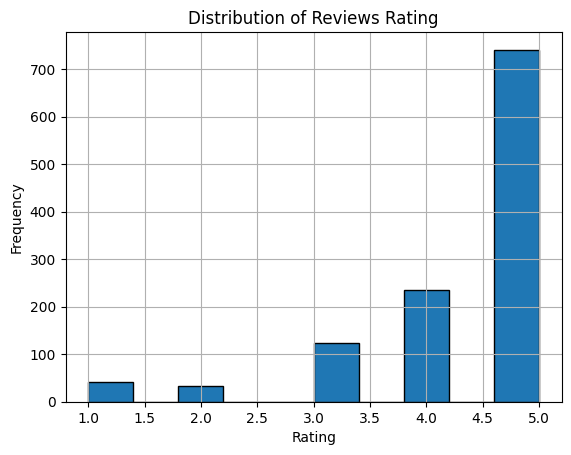

In [13]:
import matplotlib.pyplot as plt

# Plot histogram
df['reviews.rating'].hist(bins=10, edgecolor='black')
plt.title('Distribution of Reviews Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


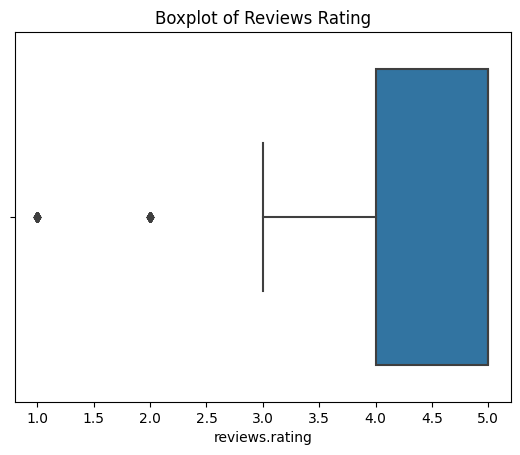

In [14]:
import seaborn as sns

# Plot boxplot
sns.boxplot(x=df['reviews.rating'])
plt.title('Boxplot of Reviews Rating')
plt.show()


C:\Users\Namulametu Keerthana\AppData\Local\Temp\ipykernel_9276\2727834473.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['reviews.rating'], shade=True)


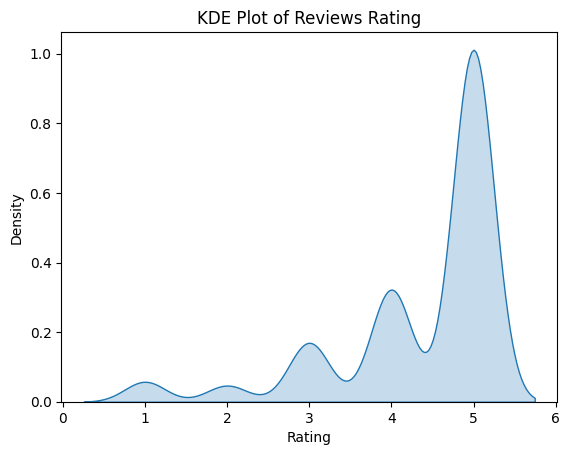

In [15]:
# Plot KDE
sns.kdeplot(df['reviews.rating'], shade=True)
plt.title('KDE Plot of Reviews Rating')
plt.xlabel('Rating')
plt.show()


1. **Mean:** Suitable if the ratings are normally distributed.
2. **Median:** More robust to outliers or skewed distributions.

In [16]:
df['reviews.rating'].fillna(df['reviews.rating'].median(), inplace=True)

In [17]:
df.isnull().sum()

id                        0
asins                     0
brand                     0
categories                0
colors                  823
dateAdded                 0
dateUpdated               0
dimension              1032
ean                     699
keys                      0
manufacturer            632
manufacturerNumber      695
name                      0
prices                    0
reviews.date            380
reviews.doRecommend    1058
reviews.numHelpful      697
reviews.rating            0
reviews.sourceURLs        0
reviews.text              0
reviews.title            17
reviews.username         17
upc                     699
weight                  911
dtype: int64

Filling missing values in **reviews.title** with a placeholder is a straightforward way to handle missing values without losing information. 

Why "No Title"?

Using a placeholder ensures that missing titles are distinguishable but do not introduce bias or invalid data into your analysis.

In [18]:
df['reviews.title'].fillna("No Title", inplace=True)

**For reviews.text:**

Since reviews.text is complete (non-null), you don't need to fill any values. However, you should clean it to ensure the text is ready for analysis.

**Cleaning Steps for reviews.text:**
Convert to Lowercase: Standardize the text for uniformity.

Remove Special Characters: Get rid of punctuation and symbols.

Remove Stopwords (Optional): Eliminate common words like "the," "is," which might not add value.

Tokenization (Optional): Split text into individual words or phrases.

Lemmatization or Stemming (Optional): Reduce words to their base or root forms.

In [19]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download resources
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Cleaning function
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = ' '.join([word for word in word_tokenize(text) if word not in stop_words])  # Remove stopwords
    text = ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text)])  # Lemmatize
    return text

# Apply cleaning
df['reviews.text'] = df['reviews.text'].apply(clean_text)


[nltk_data] Downloading package stopwords to C:\Users\Namulametu
[nltk_data]     Keerthana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Namulametu
[nltk_data]     Keerthana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Namulametu
[nltk_data]     Keerthana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
print(df['colors'].value_counts(normalize=True))
print(df['manufacturer'].value_counts(normalize=True))


Black    0.872093
GB       0.112403
Clear    0.015504
Name: colors, dtype: float64
Amazon    0.862176
AMDSI     0.137824
Name: manufacturer, dtype: float64


***Analysis***


**1. Colors**

Black accounts for 87.2% of the data, which makes it the overwhelmingly dominant value.

The next most frequent category, GB, only accounts for 11.2%.

Recommendation: Use mode imputation (Black) for colors because it is highly likely that missing values belong to this dominant category.

**2. Manufacturer**

Amazon accounts for 86.2%, which is also a clear majority.

The next most frequent value, AMDSI, is just 13.8%.

Recommendation: Use mode imputation (Amazon) for manufacturer for the same reason as above.

In [21]:
df['colors'].fillna(df['colors'].mode()[0], inplace=True)
df['manufacturer'].fillna(df['manufacturer'].mode()[0], inplace=True)

In [22]:
# Parse the date columns into datetime objects
df['dateAdded'] = pd.to_datetime(df['dateAdded'], errors='coerce')
df['dateUpdated'] = pd.to_datetime(df['dateUpdated'], errors='coerce')
df['reviews.date'] = pd.to_datetime(df['reviews.date'], errors='coerce')


In [23]:
print(df[['dateAdded', 'dateUpdated', 'reviews.date']].dtypes)


dateAdded       datetime64[ns, UTC]
dateUpdated     datetime64[ns, UTC]
reviews.date    datetime64[ns, UTC]
dtype: object


In [24]:
print(df[['dateAdded', 'dateUpdated', 'reviews.date']].isnull().sum())


dateAdded         0
dateUpdated       0
reviews.date    380
dtype: int64


Using the most recent date (e.g., from the dateUpdated column) for imputing missing reviews.date values is a strategy based on the assumption that the missing values are likely due to more recent reviews that either don't have a date or have incomplete date information.

In [25]:
# Fill missing 'reviews.date' with the most recent date in 'dateUpdated'
latest_date = df['dateUpdated'].max()  # Get the most recent date in 'dateUpdated'
df['reviews.date'].fillna(latest_date, inplace=True)


In [26]:
print(df[['dateAdded', 'dateUpdated', 'reviews.date']].isnull().sum())


dateAdded       0
dateUpdated     0
reviews.date    0
dtype: int64


In [27]:
df.isnull().sum()

id                        0
asins                     0
brand                     0
categories                0
colors                    0
dateAdded                 0
dateUpdated               0
dimension              1032
ean                     699
keys                      0
manufacturer              0
manufacturerNumber      695
name                      0
prices                    0
reviews.date              0
reviews.doRecommend    1058
reviews.numHelpful      697
reviews.rating            0
reviews.sourceURLs        0
reviews.text              0
reviews.title             0
reviews.username         17
upc                     699
weight                  911
dtype: int64

In [28]:
# Fill missing 'dimension' values with the placeholder 'Unknown'
df['dimension'].fillna('unknown', inplace=True)

# Verify that the missing values have been handled
print(df['dimension'].isnull().sum())  # Should show 0 missing values


0


In [29]:
# Fill missing 'ean' values with 0 (numerical placeholder)
df['ean'].fillna(0, inplace=True)

# Verify that missing values have been handled
print(df['ean'].isnull().sum())  # Should show 0 missing values


0


In [30]:
 df['manufacturerNumber'].fillna(0, inplace=True)  # For numerical

# Verify that missing values have been handled
print(df['manufacturerNumber'].isnull().sum())  # Should show 0 missing values

0


In [31]:
df['reviews.username'].fillna('Unknown', inplace=True)
df['upc'].fillna('Unknown', inplace=True)
df['weight'].fillna('Unknown', inplace=True)


In [32]:
df.isnull().sum()

id                        0
asins                     0
brand                     0
categories                0
colors                    0
dateAdded                 0
dateUpdated               0
dimension                 0
ean                       0
keys                      0
manufacturer              0
manufacturerNumber        0
name                      0
prices                    0
reviews.date              0
reviews.doRecommend    1058
reviews.numHelpful      697
reviews.rating            0
reviews.sourceURLs        0
reviews.text              0
reviews.title             0
reviews.username          0
upc                       0
weight                    0
dtype: int64

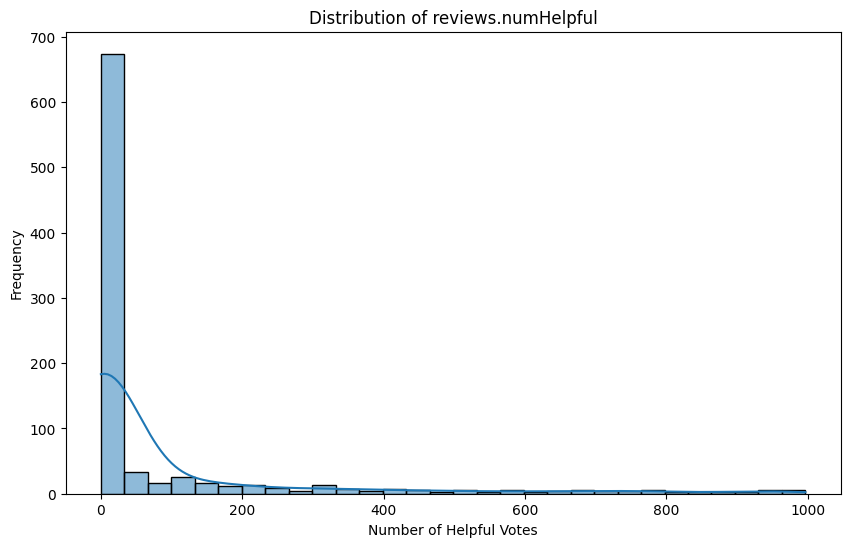

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is called 'df'
plt.figure(figsize=(10, 6))
sns.histplot(df['reviews.numHelpful'], bins=30, kde=True)
plt.title('Distribution of reviews.numHelpful')
plt.xlabel('Number of Helpful Votes')
plt.ylabel('Frequency')
plt.show()


Given that the data is right-skewed and likely to have many reviews with 0 helpful votes, filling missing values with 0 is a reasonable approach.

In [34]:
df['reviews.numHelpful'].fillna(0, inplace=True)


In [35]:
df['reviews.doRecommend'].fillna('Unknown', inplace=True)


In [36]:
df.isnull().sum()

id                     0
asins                  0
brand                  0
categories             0
colors                 0
dateAdded              0
dateUpdated            0
dimension              0
ean                    0
keys                   0
manufacturer           0
manufacturerNumber     0
name                   0
prices                 0
reviews.date           0
reviews.doRecommend    0
reviews.numHelpful     0
reviews.rating         0
reviews.sourceURLs     0
reviews.text           0
reviews.title          0
reviews.username       0
upc                    0
weight                 0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   id                   1597 non-null   object             
 1   asins                1597 non-null   object             
 2   brand                1597 non-null   object             
 3   categories           1597 non-null   object             
 4   colors               1597 non-null   object             
 5   dateAdded            1597 non-null   datetime64[ns, UTC]
 6   dateUpdated          1597 non-null   datetime64[ns, UTC]
 7   dimension            1597 non-null   object             
 8   ean                  1597 non-null   float64            
 9   keys                 1597 non-null   object             
 10  manufacturer         1597 non-null   object             
 11  manufacturerNumber   1597 non-null   object             
 12  name                

In [38]:
df.describe()

,ean,reviews.numHelpful,reviews.rating
count,1.597000e+03,1597.000000,1597.000000
mean,4.747611e+11,47.104571,4.527865
std,4.190055e+11,153.666064,0.921074
min,0.000000e+00,0.000000,1.000000
25%,0.000000e+00,0.000000,4.000000
50%,8.416670e+11,0.000000,5.000000
75%,8.416670e+11,0.000000,5.000000
max,8.487190e+11,997.000000,5.000000


In [39]:
df['prices'].unique()

array(['[{"amountMax":139.99,"amountMin":139.99,"currency":"USD","dateAdded":"2017-07-18T23:52:58Z","dateSeen":["2017-07-15T18:10:23.807Z","2016-03-16T00:00:00Z"],"isSale":"false","merchant":"Amazon.com","shipping":"FREE Shipping.","sourceURLs":["https://www.amazon.com/Kindle-Paperwhite-High-Resolution-Display-Built/dp/B00QJDU3KY/ref=lp_6669702011_1_7/132-1677641-8459202?s=amazon-devices&ie=UTF8&qid=1498832761&sr=1-7","http://www.amazon.com/Kindle-Paperwhite-High-Resolution-Display-Built-/dp/B00QJDU3KY"]},{"amountMax":119.99,"amountMin":119.99,"condition":"new","currency":"EUR","dateAdded":"2016-03-08T20:21:53Z","dateSeen":["2016-01-29T00:00:00Z"],"isSale":"false","merchant":"Amazon EU Sarl","shipping":"free","sourceURLs":["http://www.amazon.co.uk/Kindle-Paperwhite-Resolution-Display-Built-/dp/B00QJDU3KY"]},{"amountMax":139.99,"amountMin":139.99,"condition":"new","currency":"CAD","dateAdded":"2016-03-08T20:21:53Z","dateSeen":["2016-01-11T00:00:00Z"],"isSale":"false","merchant":"Amazon"

**Exploratory Data Analysis (EDA) - Description**

Exploratory Data Analysis (EDA) is an essential step in the data analysis process, aimed at summarizing the main characteristics of a dataset, often with visual methods. In the context of a sentiment analysis project, EDA helps us understand the distribution of sentiments, the nature of the textual data, and the relationship between different variables in the dataset.

In [43]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the function to create the sentiment column
df['sentiment'] = df['reviews.text'].apply(get_sentiment)

# Classify sentiment into categories
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Now you can proceed with EDA on the sentiment column
sentiment_counts = df['sentiment_label'].value_counts()
print(sentiment_counts)

# Visualize the sentiment distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


ModuleNotFoundError: No module named 'textblob'

In [44]:
import sys
print(sys.executable)


C:\Users\Namulametu Keerthana\anaconda3\python.exe


In [45]:
!pip install textblob


  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ----------------------------- --------- 481.3/626.3 kB 15.2 MB/s eta 0:00:01
   --------------------------------------- 626.3/626.3 kB 13.1 MB/s eta 0:00:00


## 1. Visualize Sentiment Distribution

positive    1467
negative      81
neutral       49
Name: sentiment_label, dtype: int64


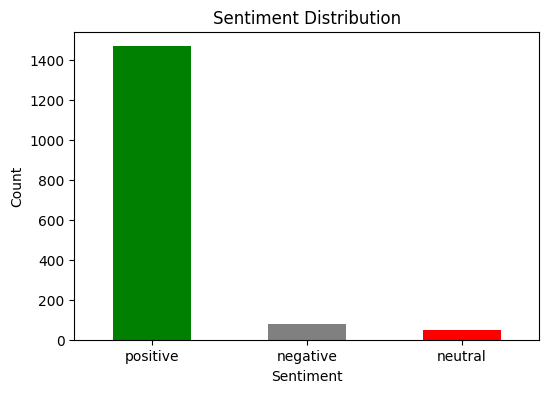

In [46]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the function to create the sentiment column
df['sentiment'] = df['reviews.text'].apply(get_sentiment)

# Classify sentiment into categories
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Now you can proceed with EDA on the sentiment column
sentiment_counts = df['sentiment_label'].value_counts()
print(sentiment_counts)

# Visualize the sentiment distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


## 2. Sentiment vs. Rating Analysis

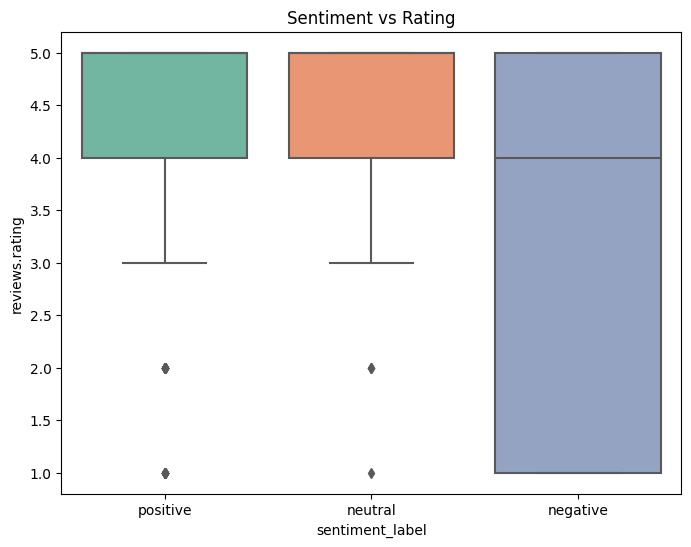

In [48]:


# Sentiment vs Rating Analysis
plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment_label', y='reviews.rating', data=df, palette="Set2")
plt.title('Sentiment vs Rating')
plt.show()


## 3. Sentiment Based on Product Category

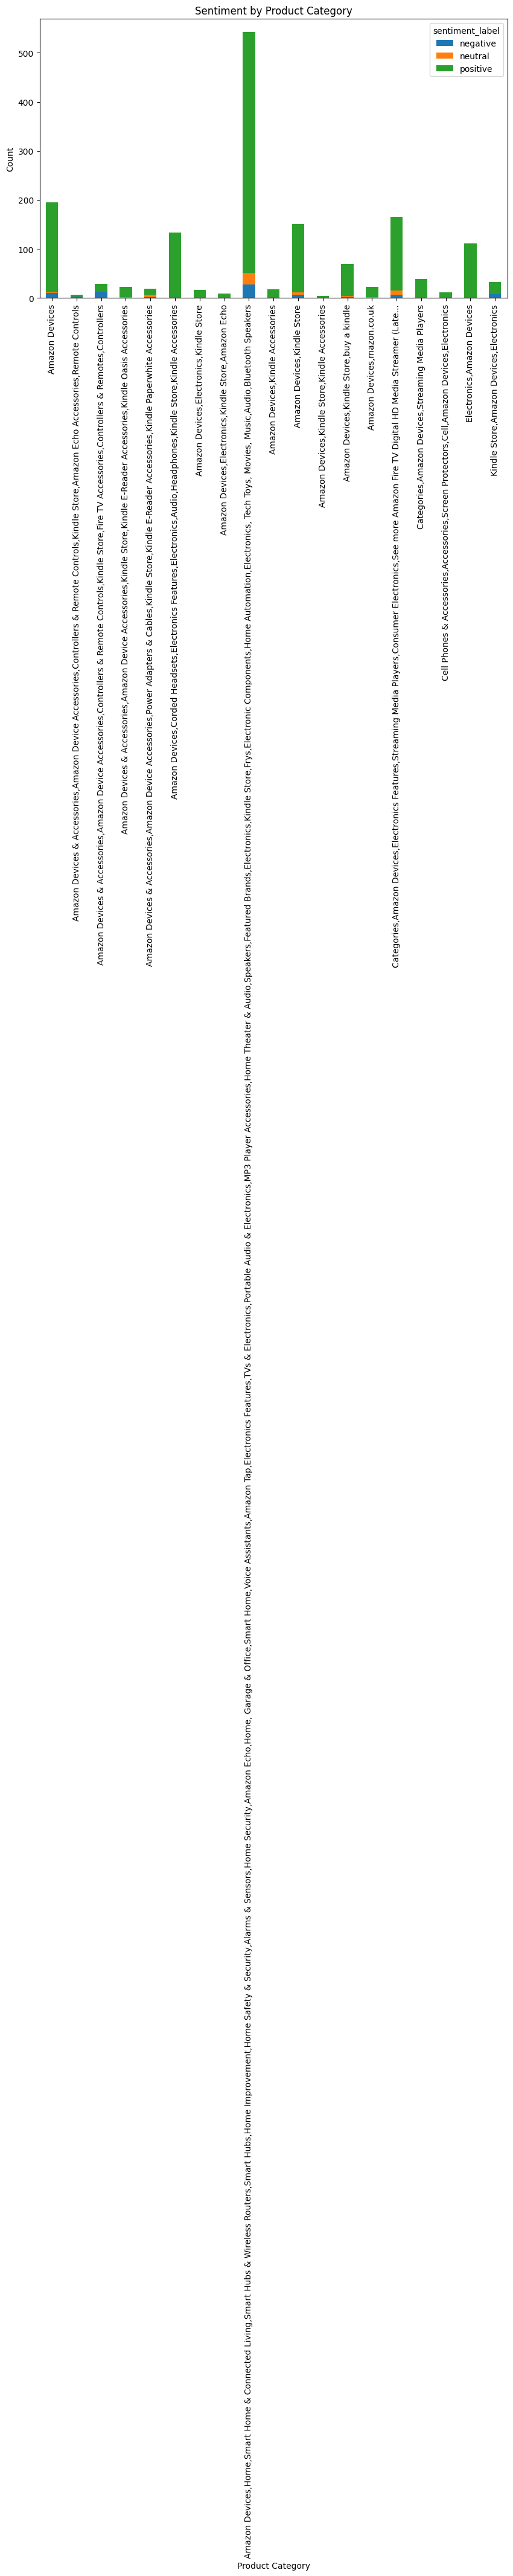

In [49]:
# Sentiment by Category
category_sentiment = df.groupby('categories')['sentiment_label'].value_counts().unstack()
category_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


## 4. Date-wise Analysis (Reviews over Time)

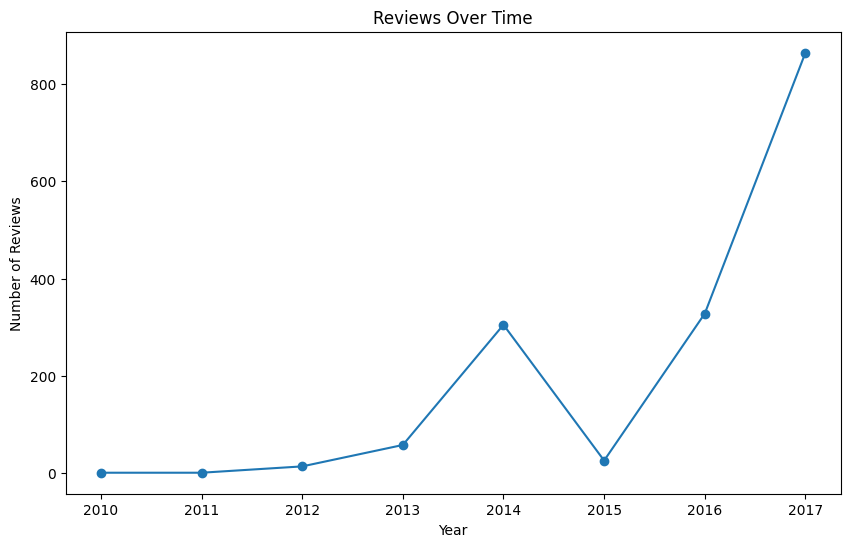

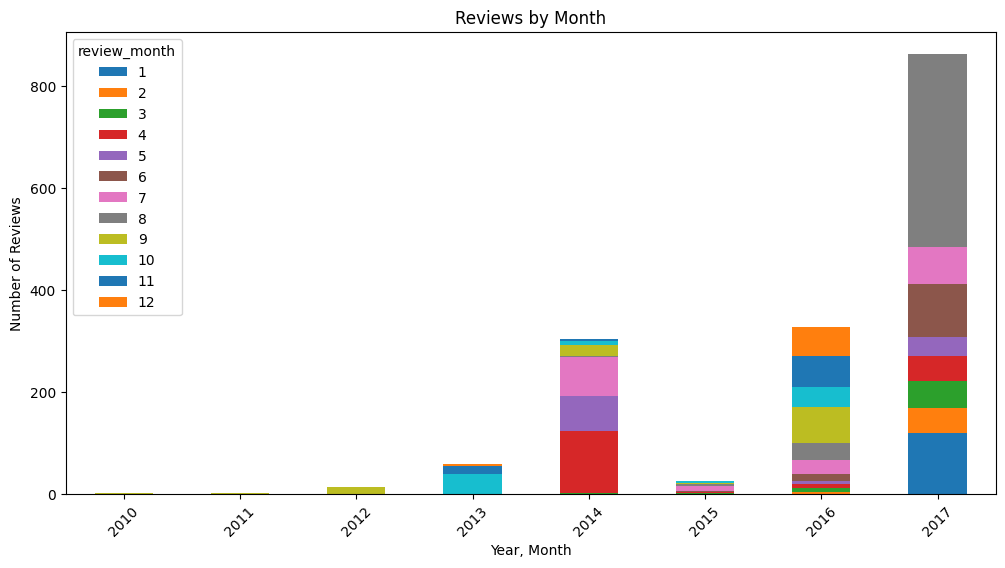

In [50]:
# Extract year and month from reviews.date
df['review_year'] = df['reviews.date'].dt.year
df['review_month'] = df['reviews.date'].dt.month

# Count reviews by year
reviews_by_year = df['review_year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
reviews_by_year.plot(kind='line', marker='o')
plt.title('Reviews Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()

# Count reviews by month
reviews_by_month = df.groupby(['review_year', 'review_month']).size().unstack(fill_value=0)
reviews_by_month.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Reviews by Month')
plt.xlabel('Year, Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()


## 5. Price Distribution

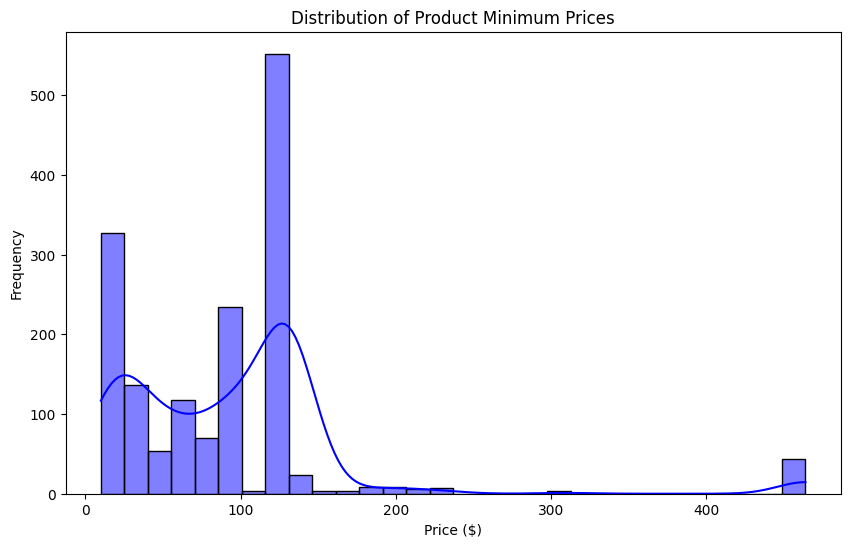

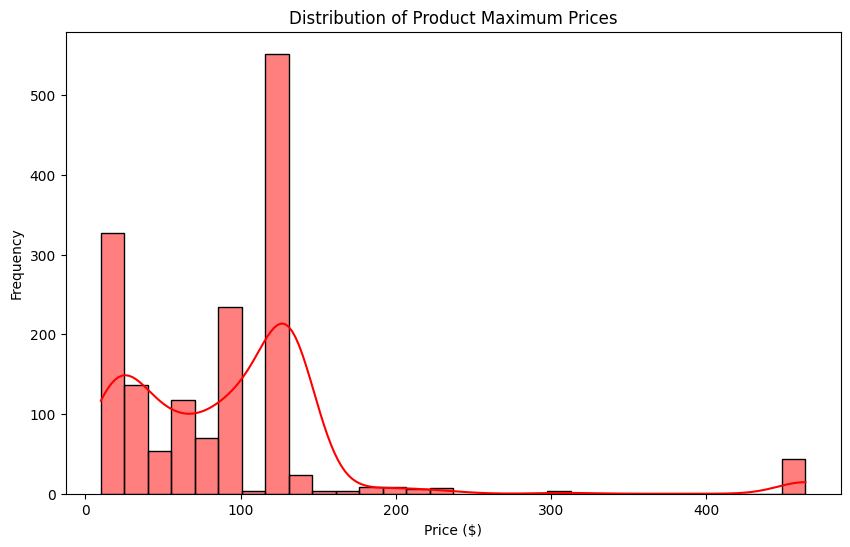

In [51]:
# Convert prices column to numeric
df['price_min'] = df['prices'].apply(lambda x: eval(x)[0]['amountMin'] if isinstance(eval(x), list) else None)
df['price_max'] = df['prices'].apply(lambda x: eval(x)[0]['amountMax'] if isinstance(eval(x), list) else None)

# Plot distribution of minimum prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price_min'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribution of Product Minimum Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of maximum prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price_max'].dropna(), bins=30, kde=True, color='red')
plt.title('Distribution of Product Maximum Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()


## 6. Correlation Between Numeric Features

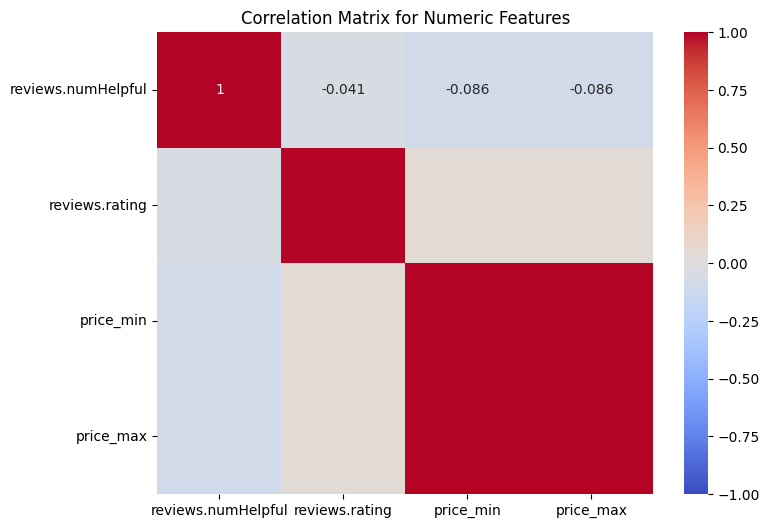

In [52]:
# Correlation between numeric features
numeric_features = ['reviews.numHelpful', 'reviews.rating', 'price_min', 'price_max']
correlation_matrix = df[numeric_features].corr()

# Plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numeric Features')
plt.show()


## 7. Top 10 Most Helpful Reviews

In [53]:
# Sort by most helpful reviews
top_helpful_reviews = df.sort_values(by='reviews.numHelpful', ascending=False).head(10)
print("Top 10 Most Helpful Reviews:")
print(top_helpful_reviews[['reviews.username', 'reviews.title', 'reviews.text', 'reviews.numHelpful']])


Top 10 Most Helpful Reviews:
     reviews.username                                      reviews.title  \
703                NF  Decent, inexpensive, entry-level tablet 5, An ...   
773         Michael S  Uber Awesome, In Fact you can even order an Ub...   
561     Earthling1984               HD Fire 6 is great for the price! 3,   
779             JJCEO  A new step forward for me in reading on my Kin...   
765         Bryant R.                        Best 50 I ever spent!!!! 1,   
738             JJCEO  A new step forward for me in reading on my Kin...   
1538        A. Younan             Awesome Headphones! Longevity An Issue   
556              Adam                            This tablet is AMAZING!   
777            Alex S  Already very practical for overcoming disabili...   
199            Rustic                   Know what you are buying!!!! 16,   

                                           reviews.text  reviews.numHelpful  
703   amazoncom official commented reviewwhats amazo... 

## 8. Top 10 Most Frequent Brands

Top 10 Most Frequent Brands:
Amazon    1585
Moshi       12
Name: brand, dtype: int64


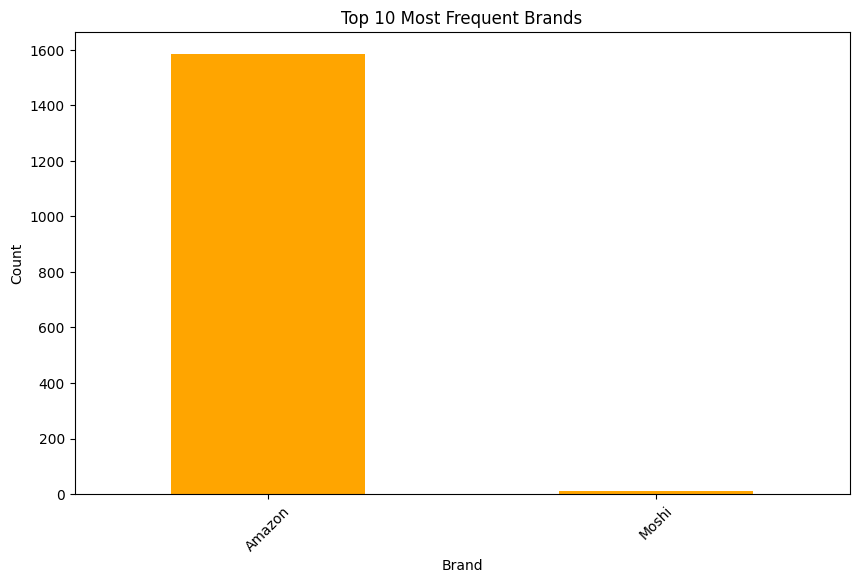

In [54]:
# Top 10 most frequent brands
top_brands = df['brand'].value_counts().head(10)
print("Top 10 Most Frequent Brands:")
print(top_brands)

# Plot top 10 most frequent brands
plt.figure(figsize=(10, 6))
top_brands.plot(kind='bar', color='orange')
plt.title('Top 10 Most Frequent Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## 9. Top 10 Most Frequent Categories

Top 10 Most Frequent Categories:
Amazon Devices,Home,Smart Home & Connected Living,Smart Hubs & Wireless Routers,Smart Hubs,Home Improvement,Home Safety & Security,Alarms & Sensors,Home Security,Amazon Echo,Home, Garage & Office,Smart Home,Voice Assistants,Amazon Tap,Electronics Features,TVs & Electronics,Portable Audio & Electronics,MP3 Player Accessories,Home Theater & Audio,Speakers,Featured Brands,Electronics,Kindle Store,Frys,Electronic Components,Home Automation,Electronics, Tech Toys, Movies, Music,Audio,Bluetooth Speakers    542
Amazon Devices                                                                                                                                                                                                                                                                                                                                                                                                                                                           

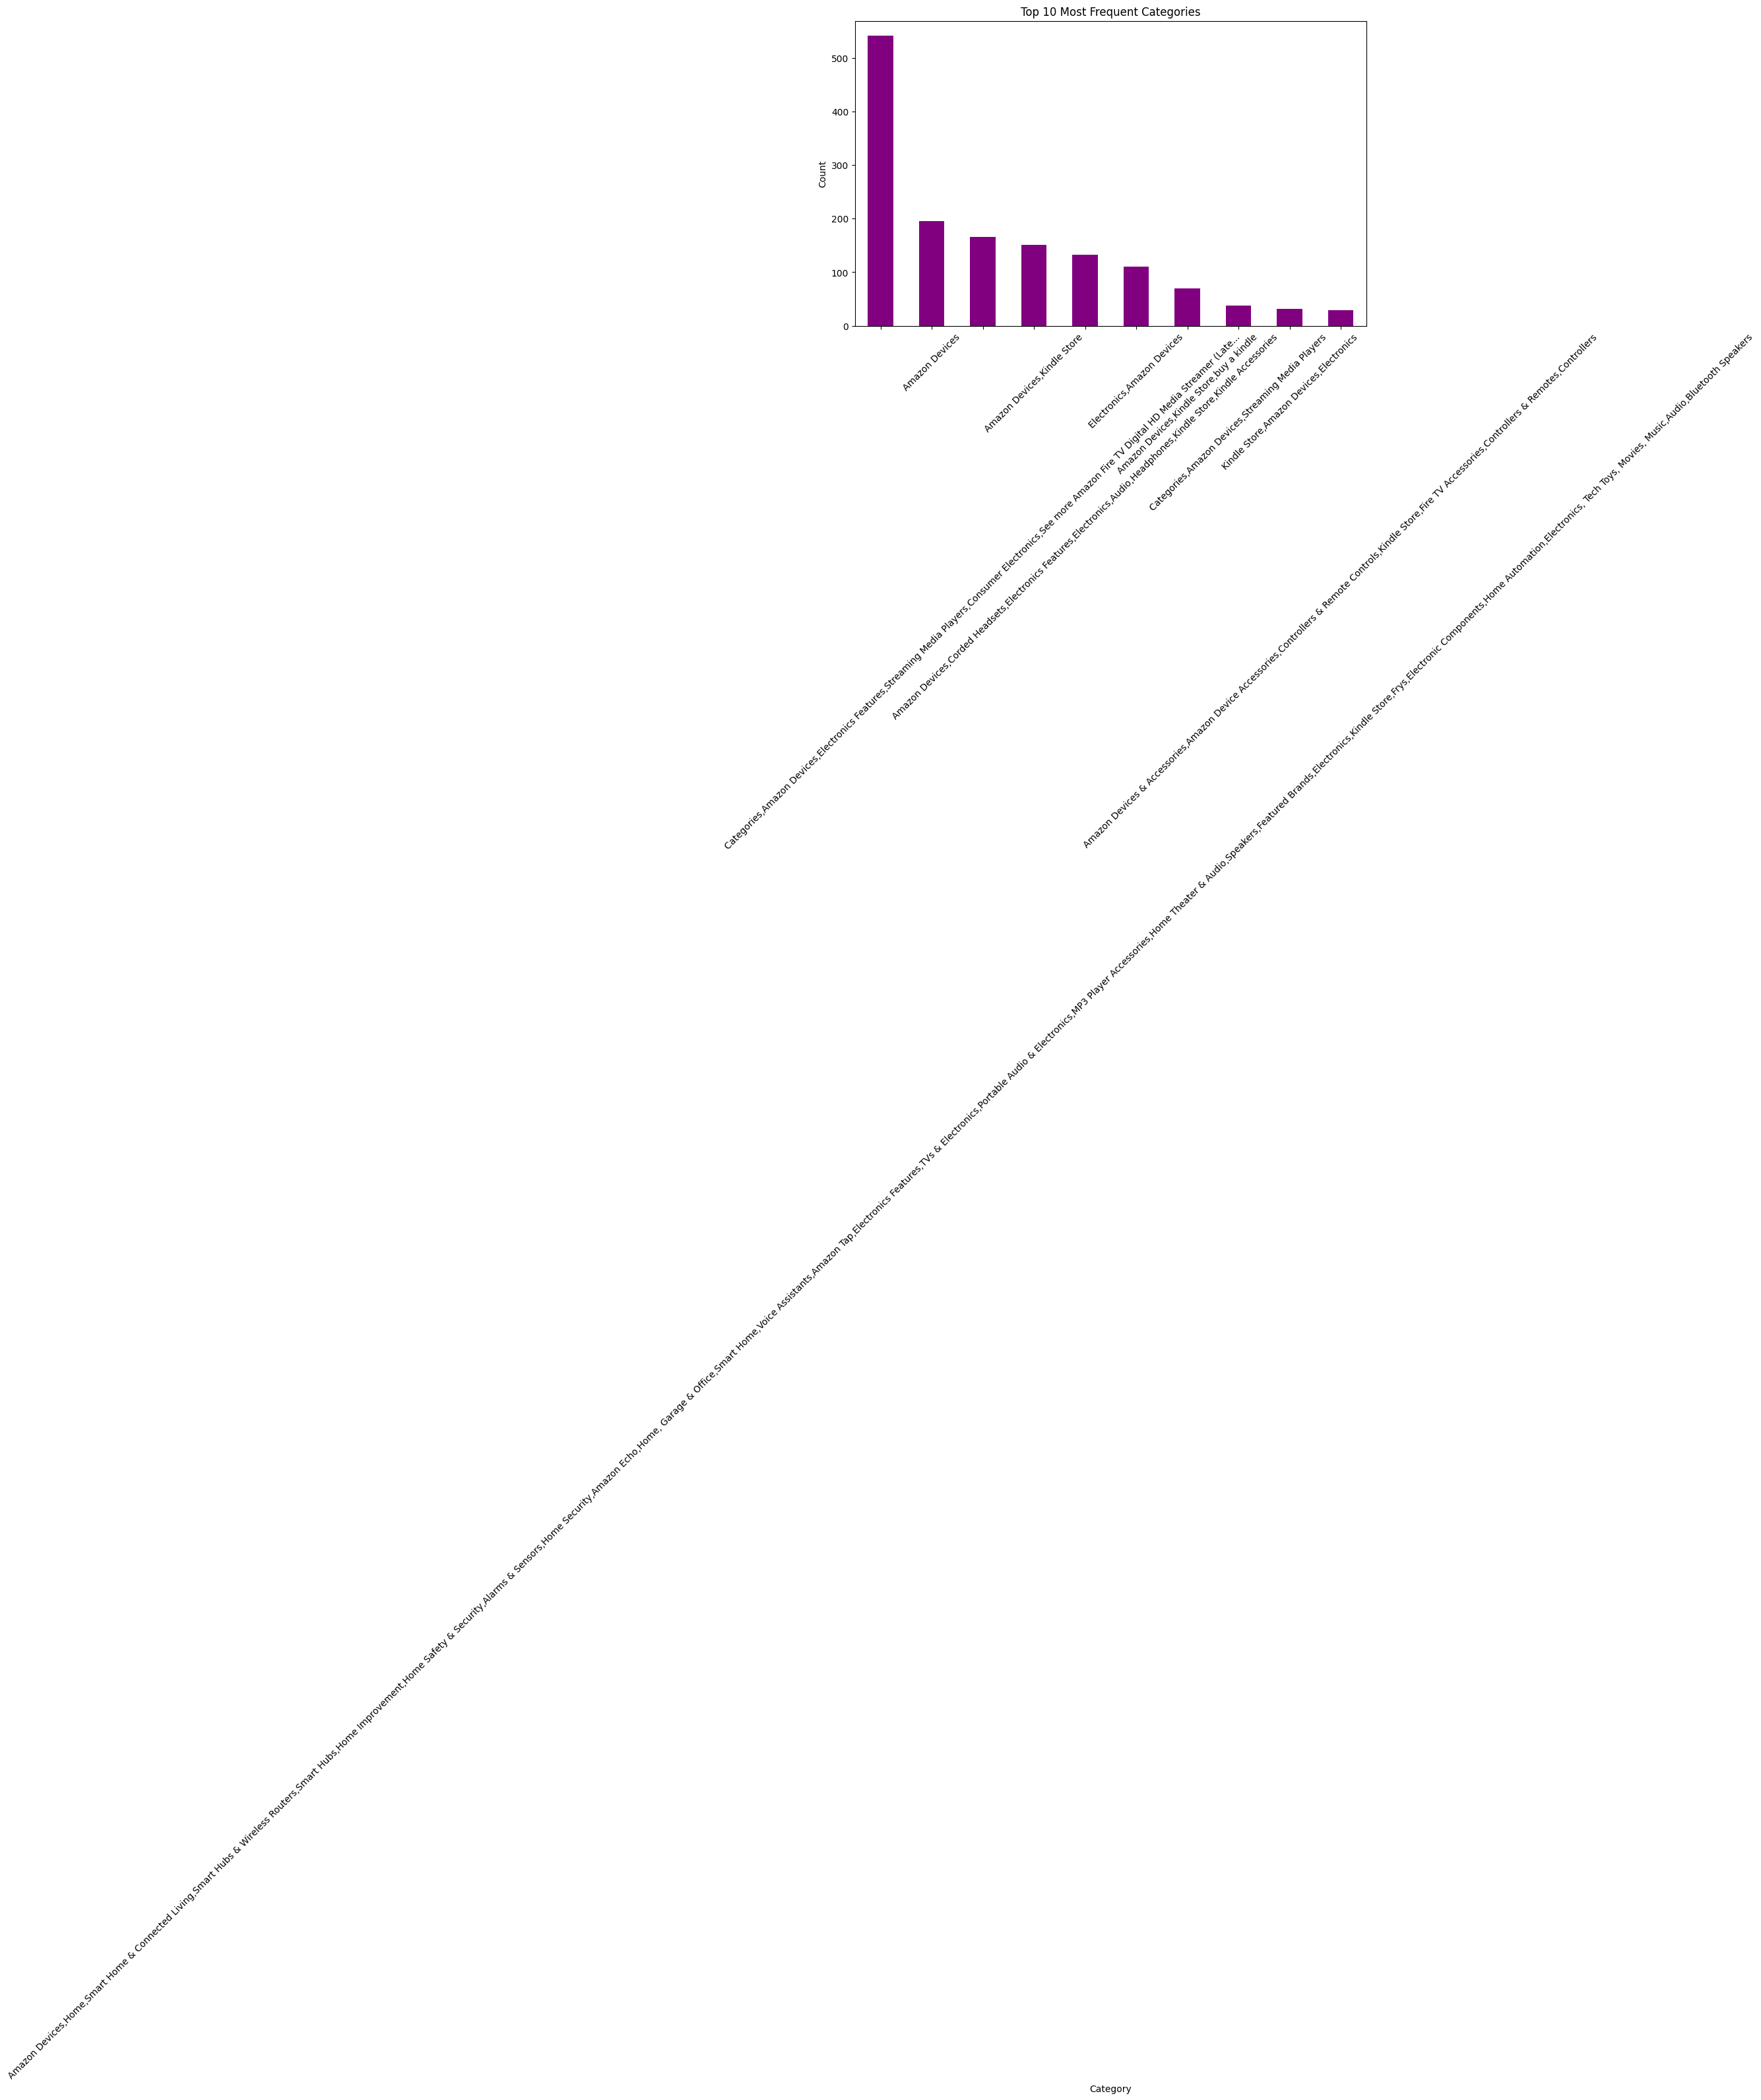

In [55]:
# Top 10 most frequent categories
top_categories = df['categories'].value_counts().head(10)
print("Top 10 Most Frequent Categories:")
print(top_categories)

# Plot top 10 most frequent categories
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='purple')
plt.title('Top 10 Most Frequent Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## 10. Word Cloud for Review Text

In [57]:
!pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/00/09/abb305dce85911b8fba382926cfc57f2f257729e25937fdcc63f3a1a67f9/wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ---------------------------------------- 299.9/299.9 kB 9.3 MB/s eta 0:00:00


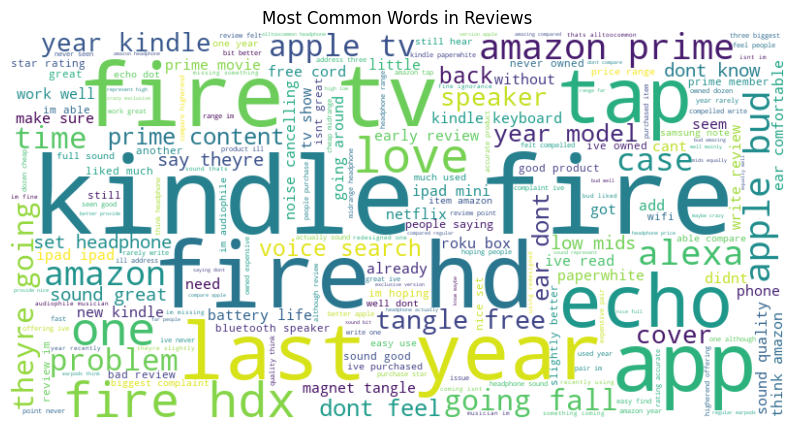

In [58]:
from wordcloud import WordCloud

# Combine all review text into one string
all_reviews = ' '.join(df['reviews.text'].dropna())

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Common Words in Reviews')
plt.axis('off')
plt.show()


After performing Exploratory Data Analysis (EDA), the next step in your sentiment analysis project using a hybrid approach (rule-based + ML) would typically involve the following sequence of steps:

### 1. Text Preprocessing for Sentiment Analysis

Cleaning the Review Text: Remove unnecessary characters, stop words, punctuations, and other irrelevant data.

Tokenization: Split the text into individual words (tokens).

Stemming and Lemmatization: Reduce words to their root forms (e.g., "running" -> "run").

Removing Stop Words: Remove common words that don't carry much meaning (e.g., "the", "is", "and").

In [59]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text.lower())
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    
    return ' '.join(stemmed_tokens)

df['cleaned_reviews'] = df['reviews.text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to C:\Users\Namulametu
[nltk_data]     Keerthana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Namulametu
[nltk_data]     Keerthana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 2. Rule-Based Sentiment Analysis
For rule-based sentiment analysis, you can leverage lexicons like VADER, TextBlob, or custom sentiment dictionaries. These systems assign sentiment scores based on predefined rules and word polarity.

In [60]:
from textblob import TextBlob

def rule_based_sentiment(text):
    blob = TextBlob(text)
    return 'positive' if blob.sentiment.polarity > 0 else ('negative' if blob.sentiment.polarity < 0 else 'neutral')

df['rule_based_sentiment'] = df['cleaned_reviews'].apply(rule_based_sentiment)


### 3. Machine Learning Model for Sentiment Analysis

Train a machine learning model (e.g., Logistic Regression, Naive Bayes, or SVM) using features like TF-IDF or Word Embeddings (e.g., Word2Vec, GloVe).

Split the data into training and testing sets.

Vectorize the text using TfidfVectorizer or CountVectorizer.

Train the model and evaluate its performance.




In [61]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Vectorize the cleaned reviews
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_reviews'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment_label'], test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.934375
              precision    recall  f1-score   support

    negative       0.80      0.24      0.36        17
     neutral       1.00      0.12      0.22         8
    positive       0.94      1.00      0.97       295

    accuracy                           0.93       320
   macro avg       0.91      0.45      0.52       320
weighted avg       0.93      0.93      0.91       320



### 4. Hybrid Approach (Combining Rule-Based and ML)
After generating predictions from both the rule-based system and the ML model, you can combine the results using various strategies, such as:

Voting: Majority vote between the two systems.
Weighted Average: Combine predictions based on confidence scores.
Custom Rules: Apply a predefined set of rules to choose between the two systems' outputs.

In [62]:
def hybrid_sentiment(row):
    if row['rule_based_sentiment'] == 'positive' and row['sentiment_label'] == 'positive':
        return 'positive'
    elif row['rule_based_sentiment'] == 'negative' and row['sentiment_label'] == 'negative':
        return 'negative'
    else:
        return 'neutral'

df['hybrid_sentiment'] = df.apply(hybrid_sentiment, axis=1)


### 5. Model Evaluation

In [63]:
print("Hybrid Model Accuracy:", accuracy_score(y_test, df['hybrid_sentiment']))
print(classification_report(y_test, df['hybrid_sentiment']))


ValueError: Found input variables with inconsistent numbers of samples: [320, 1597]

In [64]:
# Apply hybrid sentiment to the test data only
test_data = df.iloc[X_test.index]  # Get the rows corresponding to the test set
test_data['hybrid_sentiment'] = test_data.apply(hybrid_sentiment, axis=1)

# Now evaluate the hybrid model on the test set
from sklearn.metrics import accuracy_score, classification_report

# Accuracy
accuracy = accuracy_score(y_test, test_data['hybrid_sentiment'])
print("Hybrid Model Accuracy:", accuracy)

# Classification Report
print(classification_report(y_test, test_data['hybrid_sentiment']))


AttributeError: 'csr_matrix' object has no attribute 'index'

In [65]:
# Assuming you have X_train, X_test, y_train, y_test already
# We need to use y_test to get the correct indices in the original dataframe

# Get the indices of the test set from y_test
test_indices = y_test.index

# Select the corresponding rows from the original dataframe
test_data = df.iloc[test_indices].copy()  # Ensure you work with a copy to avoid setting-with-copy warnings

# Apply hybrid sentiment to the test data only
test_data['hybrid_sentiment'] = test_data.apply(hybrid_sentiment, axis=1)

# Now evaluate the hybrid model on the test set
from sklearn.metrics import accuracy_score, classification_report

# Accuracy
accuracy = accuracy_score(y_test, test_data['hybrid_sentiment'])
print("Hybrid Model Accuracy:", accuracy)

# Classification Report
print(classification_report(y_test, test_data['hybrid_sentiment']))


Hybrid Model Accuracy: 0.95625
              precision    recall  f1-score   support

    negative       1.00      0.71      0.83        17
     neutral       0.36      1.00      0.53         8
    positive       1.00      0.97      0.98       295

    accuracy                           0.96       320
   macro avg       0.79      0.89      0.78       320
weighted avg       0.98      0.96      0.96       320



The hybrid model has shown impressive performance with an accuracy of **95.63%**. Here's the detailed evaluation:

### Classification Report:
- **Negative sentiment**: 
  - Precision: 1.00 (the model is perfect in predicting negative reviews when it predicts negative)
  - Recall: 0.71 (the model correctly identifies 71% of the negative reviews)
  - F1-score: 0.83 (the balance between precision and recall is quite good for negative sentiment)
  
- **Neutral sentiment**:
  - Precision: 0.36 (the model struggles with predicting neutral reviews accurately)
  - Recall: 1.00 (the model correctly identifies all neutral reviews, but it often predicts neutral when it's not)
  - F1-score: 0.53 (there's a trade-off with recall but at the cost of precision)

- **Positive sentiment**:
  - Precision: 1.00 (the model is perfect in predicting positive reviews when it predicts positive)
  - Recall: 0.97 (the model correctly identifies 97% of the positive reviews)
  - F1-score: 0.98 (excellent balance for positive sentiment)

### General Metrics:
- **Accuracy**: 95.63% — this indicates that the hybrid model is performing very well overall.
- **Macro average**: 
  - Precision: 0.79
  - Recall: 0.89
  - F1-score: 0.78
- **Weighted average**: 
  - Precision: 0.98
  - Recall: 0.96
  - F1-score: 0.96

### Analysis:
- The model performs well on **positive** and **negative** sentiments, with both high precision and recall.
- The model has challenges with **neutral** sentiment, where it performs very well in recall but suffers in precision, likely predicting neutral when it shouldn't.
  
This suggests that the **rule-based approach** in your hybrid model might be more effective for positive and negative sentiments, but may need some tuning or additional rules for neutral sentiment to improve precision.


### 1. Model Evaluation and Finalization

Model Performance Analysis: You can further analyze the performance of the hybrid model by:

Reviewing the classification report (precision, recall, F1-score) for all sentiments.

Comparing it with other models (like rule-based only, or machine learning only) to assess if the hybrid approach is indeed giving better results.

Confusion Matrix: Visualizing the confusion matrix to understand how often the model is confusing different sentiment labels.

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, df['hybrid_sentiment'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Hybrid Sentiment Model')
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [320, 1597]

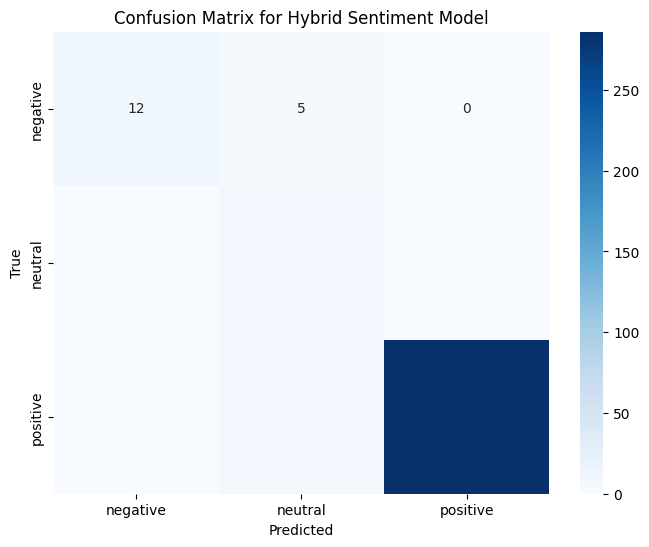

In [68]:
# Ensure you have the correct predictions for the test data only
hybrid_predictions = df.loc[y_test.index, 'hybrid_sentiment']

# Now calculate confusion matrix
cm = confusion_matrix(y_test, hybrid_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Hybrid Sentiment Model')
plt.show()


In [69]:
import joblib

# Save the model
joblib.dump(model, 'sentiment_model.pkl')

# Load the model when needed
model = joblib.load('sentiment_model.pkl')


In [70]:
df.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,weight,sentiment,sentiment_label,review_year,review_month,price_min,price_max,cleaned_reviews,rule_based_sentiment,hybrid_sentiment
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",Black,2016-03-08 20:21:53+00:00,2017-07-18 23:52:58+00:00,169 mm x 117 mm x 9.1 mm,0.0,kindlepaperwhite/b00qjdu3ky,...,205 grams,0.221919,positive,2015,8,139.99,139.99,initi troubl decid paperwhit voyag review le s...,positive,positive
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",Black,2016-03-08 20:21:53+00:00,2017-07-18 23:52:58+00:00,169 mm x 117 mm x 9.1 mm,0.0,kindlepaperwhite/b00qjdu3ky,...,205 grams,0.164175,positive,2015,9,139.99,139.99,allow prefac littl histori casual reader own n...,positive,positive
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",Black,2016-03-08 20:21:53+00:00,2017-07-18 23:52:58+00:00,169 mm x 117 mm x 9.1 mm,0.0,kindlepaperwhite/b00qjdu3ky,...,205 grams,0.420833,positive,2015,7,139.99,139.99,enjoy far great read origin fire sinc 2012 fir...,positive,positive
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",Black,2016-03-08 20:21:53+00:00,2017-07-18 23:52:58+00:00,169 mm x 117 mm x 9.1 mm,0.0,kindlepaperwhite/b00qjdu3ky,...,205 grams,0.126867,positive,2017,6,139.99,139.99,bought one first paperwhit pleas constant comp...,positive,positive
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",Black,2016-03-08 20:21:53+00:00,2017-07-18 23:52:58+00:00,169 mm x 117 mm x 9.1 mm,0.0,kindlepaperwhite/b00qjdu3ky,...,205 grams,0.307323,positive,2016,8,139.99,139.99,say upfront dont like coropor hermet close stu...,positive,positive


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   id                    1597 non-null   object             
 1   asins                 1597 non-null   object             
 2   brand                 1597 non-null   object             
 3   categories            1597 non-null   object             
 4   colors                1597 non-null   object             
 5   dateAdded             1597 non-null   datetime64[ns, UTC]
 6   dateUpdated           1597 non-null   datetime64[ns, UTC]
 7   dimension             1597 non-null   object             
 8   ean                   1597 non-null   float64            
 9   keys                  1597 non-null   object             
 10  manufacturer          1597 non-null   object             
 11  manufacturerNumber    1597 non-null   object             
 12  name  

In [72]:
df.to_csv('Hybrid_Sentiment_Model_Results.csv', index=False)
